In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, ShuffleSplit
random.seed(42)

from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from src.utils.database import get_database

In [2]:
df = get_database()

In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
1,7.657991,236.960889,14245.78912,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
2,8.322987,207.252462,28049.64628,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
3,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,7.110714,195.405858,22049.848372,7.137406,331.814581,425.383749,14.455324,66.465600,3.971980,0.521390
std,1.541313,33.161914,8725.572758,1.632200,42.378762,79.644205,3.258613,15.580125,0.767016,0.499765
min,0.227499,73.492234,320.942611,1.390871,180.206746,210.319182,4.861631,8.577013,1.496101,0.000000
25%,6.139025,176.819920,15602.773222,6.126628,305.804535,365.442814,12.189415,56.654615,3.442882,0.000000
50%,7.060349,197.529083,21033.230980,7.096843,331.004359,422.485813,14.372298,66.155790,3.979666,1.000000
75%,8.059179,215.350436,27365.374940,8.110758,358.220679,481.446065,16.832372,77.122476,4.511700,1.000000
max,13.349889,317.338124,56351.396300,13.127000,476.539717,666.690618,23.917601,120.030077,6.494749,1.000000


In [6]:
df.Potability.value_counts(True)

1    0.52139
0    0.47861
Name: Potability, dtype: float64

### a) Display yhe histogram of all attibutes including Y
---

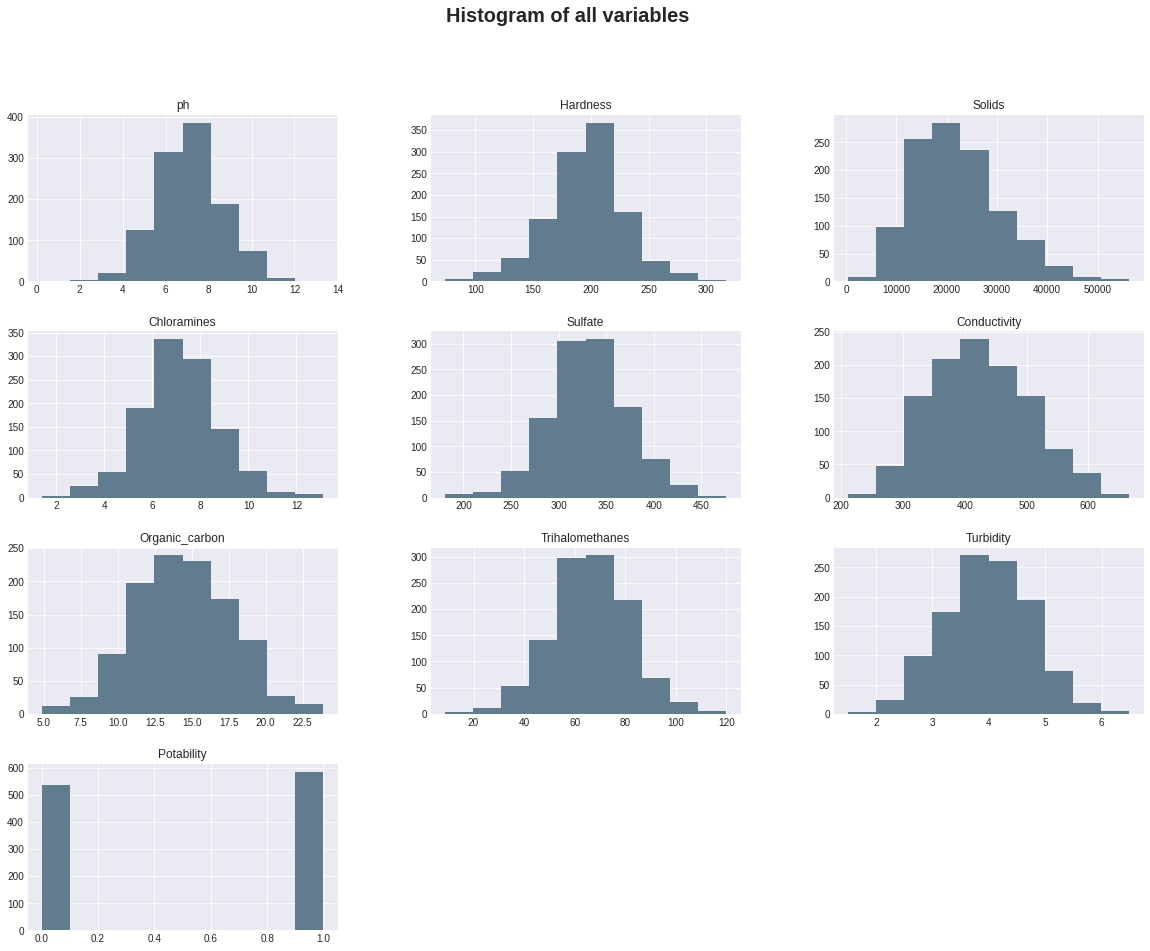

In [7]:
plt.style.use('seaborn-darkgrid')
df.hist(figsize=(20,15), color='#607c8e')
plt.suptitle("Histogram of all variables", fontsize=20, fontweight='bold')
plt.xlabel("Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(df.columns, loc='upper right')
plt.show()

### b) Display histogram of each attribute regarding Y=0 and Y=1. What is your conclusion regarding the expected performance of the classifier? Also explain why you came to this conclusion.
---

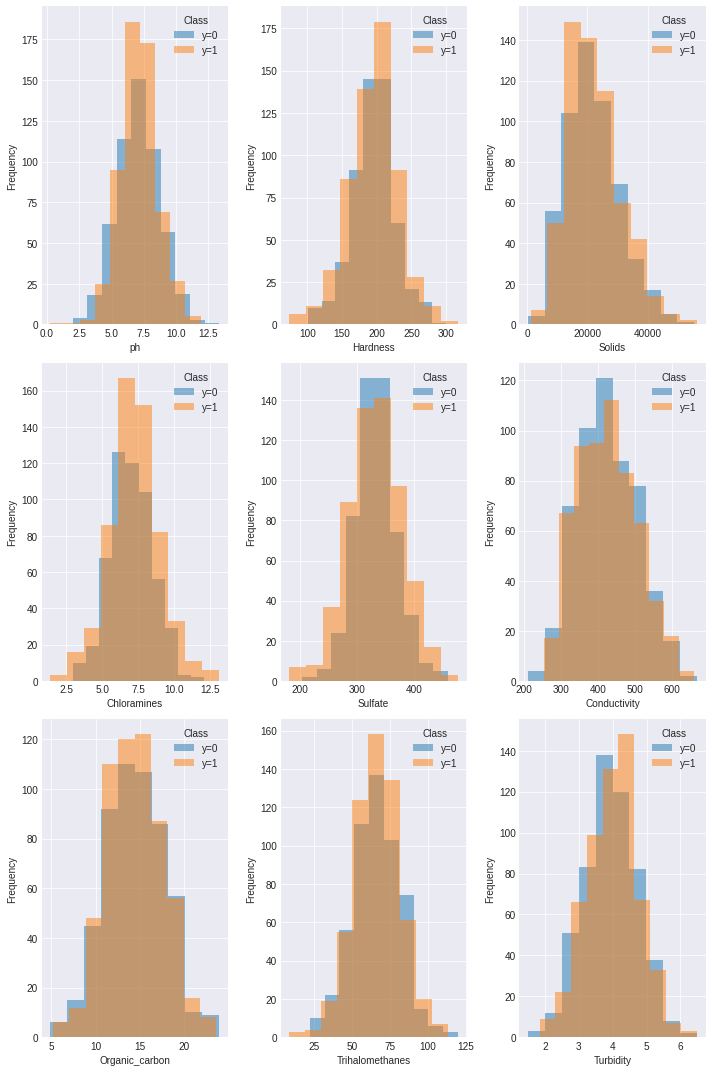

In [8]:
grouped = df.groupby('Potability')
num_cols = len(df.columns) - 1
num_rows = num_cols // 3 + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 5*num_rows))
for i, col in enumerate(df.columns[:-1]):
    row_idx, col_idx = divmod(i, 3)
    for key, group in grouped:
        group[col].hist(alpha=0.5, bins=10, ax=axes[row_idx][col_idx], label=f'y={key}')
    axes[row_idx][col_idx].set_xlabel(col)
    axes[row_idx][col_idx].set_ylabel('Frequency')
    axes[row_idx][col_idx].legend(title='Class')

for i in range(num_cols, num_rows*3):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

Conclusion: Once the histograms are similar for both classes, presenting significant overlap area, we can say that the classifier is unlikely to perform well. If the histograms of the attributes for the two classes are significantly different, it suggests that the attributes have different distributions for the two classes and are therefore informative for classification. On the other hand, if the histograms are similar, it suggests that the attributes are not strongly associated with the class labels and may not be useful for classification.

### c) Perform serval runs employing the SVM with different C and gamma parameter using cross validation. (no shuffle). Vary n_splits parameter between 10 and 50. Display the confusion matrix of the test data for each run. Calculate the obtained average Accuracy of the test data after 5 runs.
---

In [9]:
x = df.copy().drop('Potability', axis=1)
y = df.copy()["Potability"]

In [10]:
x = StandardScaler().fit_transform(x)

In [11]:
c_values = [random.uniform(0.01, 10) for i in range(0, 5)]
gamma_values = [random.uniform(0, 50) for i in range(0, 5)]
n_splits_values = [random.randint(10, 50) for i in range(0, 5)]

In [17]:
n_splits_values

[23, 24, 42, 48, 11]

In [18]:
c_values

[6.397873716594258,
 0.2598574446744427,
 2.757542890507501,
 2.239875274106739,
 7.3673474294984835]

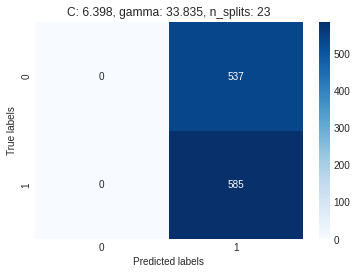

Accuracy: 52.14%


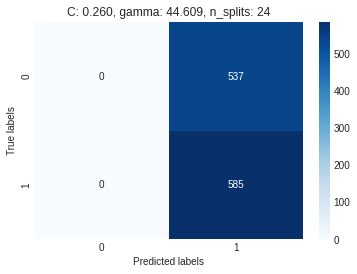

Accuracy: 52.14%


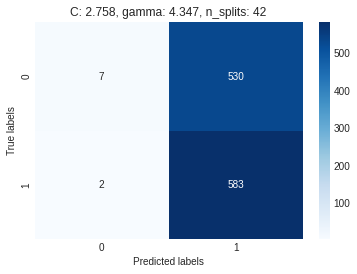

Accuracy: 52.58%


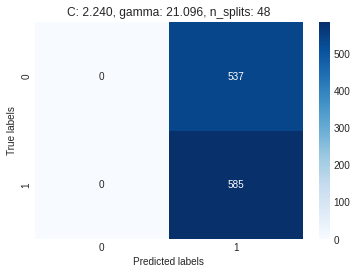

Accuracy: 52.14%


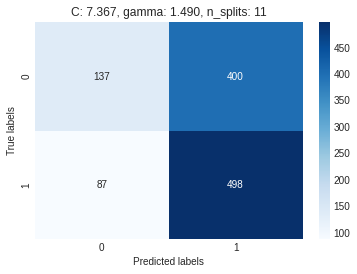

Accuracy: 56.6%
Avarege Accuracy: 53.12%


In [12]:
acc_list = list()
for i in range(len(c_values)):
    c = c_values[i]
    gamma = gamma_values[i]
    n_splits = n_splits_values[i]
    clf = svm.SVC(C=c, gamma=gamma) #creates the classifier
    y_pred = cross_val_predict(clf, x, y, cv=n_splits)
    conf_mat = confusion_matrix(y, y_pred)
    accuracy = np.diag(conf_mat).sum() / conf_mat.sum()
    acc_list.append(accuracy)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("C: {:.3f}, gamma: {:.3f}, n_splits: {:.0f}".format(c, gamma, n_splits))
    plt.show()
    print(f"Accuracy: {round(accuracy*100,2)}%")
    
avg_acc = np.mean(acc_list)
print(f"Avarege Accuracy: {round(avg_acc*100,2)}%")

### d) Perform 5 runs employing SVM with the gridsearch. Display best hyperparameter results obtained for each run. Display the confusion matrix of the test data for each run. Calculate the obtained average Accuracy of the test data after 5 runs.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
param_grid = {
    'gamma': [0.1, 1, 2, 4, 8, 10],
    'C': [1, 5, 25, 50, 100]
}

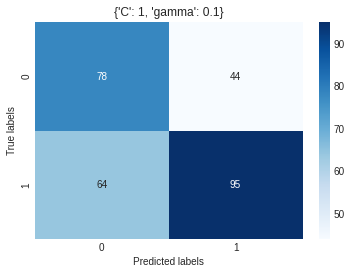

Test best score: 62.84%
Train best score: 76.81%


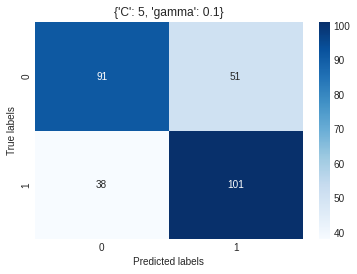

Test best score: 62.72%
Train best score: 84.54%


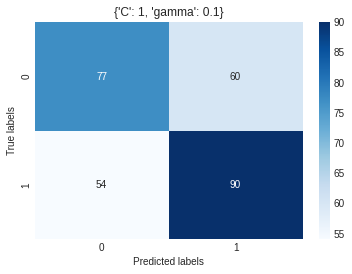

Test best score: 66.39%
Train best score: 77.65%


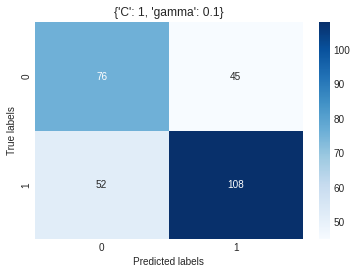

Test best score: 61.18%
Train best score: 76.22%


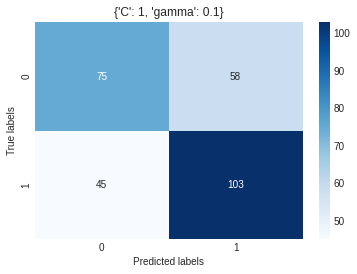

Test best score: 60.71%
Train best score: 76.1%


In [16]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    svm_model = svm.SVC()
    shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    grid_search = GridSearchCV(svm_model, param_grid, cv=shuffle_split, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    y_pred_train = grid_search.predict(X_train)
    acc = accuracy_score(y_train, y_pred_train)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"{grid_search.best_params_}")
    plt.show()
    print(f"Test best score: {round(grid_search.best_score_*100,2)}%")
    print(f"Train best score: {round(acc*100,2)}%")